In [88]:
import tensorflow as tf
import numpy as np

x = np.array([[0,0],[0,1],[1,0],[1,1]])
x

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [89]:
y = np.array([[1],[0],[0],[1]])
y

array([[1],
       [0],
       [0],
       [1]])

In [90]:
neuronios_entrada = 2
neuronios_oculta = 3
neuronios_saida = 1

In [91]:
w = {
    'oculta':tf.Variable(tf.random_normal([neuronios_entrada, neuronios_oculta]), name='w_oculta'),
    'saida':tf.Variable(tf.random_normal([neuronios_oculta, neuronios_saida]), name='w_saida')
    }

In [92]:
type(w)

dict

In [93]:
type(w['oculta'])

tensorflow.python.ops.variables.RefVariable

In [94]:
w['oculta']

<tf.Variable 'w_oculta_4:0' shape=(2, 3) dtype=float32_ref>

In [95]:
w['saida']

<tf.Variable 'w_saida_4:0' shape=(3, 1) dtype=float32_ref>

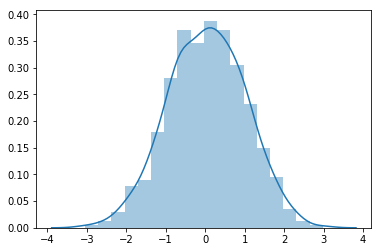

In [96]:
distribuicao = np.random.normal(size=500)
#distribuicao
import seaborn as sns
%matplotlib inline
sns.distplot(distribuicao)

In [97]:
b = {'oculta':tf.Variable(tf.random_normal([neuronios_oculta]), name='b_oculta'),
    'saida':tf.Variable(tf.random_normal([neuronios_saida]), name='b_saida')}

In [98]:
xph = tf.placeholder(tf.float32, [4, neuronios_entrada], name='xph')
yph = tf.placeholder(tf.float32, [4, neuronios_saida], name='yph')

In [99]:
camada_oculta = tf.add(tf.matmul(xph, w['oculta']), b['oculta'])
camada_oculta_ativacao = tf.sigmoid(camada_oculta)
camada_saida = tf.add(tf.matmul(camada_oculta_ativacao, w['saida']), b['saida'])
camada_saida_ativacao = tf.sigmoid(camada_saida)
erro = tf.losses.mean_squared_error(yph, camada_saida_ativacao)
otimizador = tf.train.GradientDescentOptimizer(learning_rate=0.3).minimize(erro)

In [100]:
init = tf.global_variables_initializer()

In [101]:
print(b)

{'oculta': <tf.Variable 'b_oculta_4:0' shape=(3,) dtype=float32_ref>, 'saida': <tf.Variable 'b_saida_4:0' shape=(1,) dtype=float32_ref>}


In [102]:
b['oculta']

<tf.Variable 'b_oculta_4:0' shape=(3,) dtype=float32_ref>

In [103]:
b['saida']

<tf.Variable 'b_saida_4:0' shape=(1,) dtype=float32_ref>

In [107]:
with tf.Session() as sess:
    sess.run(init)
    #print(sess.run(w['oculta']))
    #print(sess.run(w['saida']))
    #print(sess.run(b['oculta']))
    #print('\n')
    #print(sess.run(b['saida']))
    #print(sess.run(camada_oculta, feed_dict={xph:x}))
    #print(sess.run(camada_saida, feed_dict={xph:x}))
    #print(sess.run(camada_saida_ativacao, feed_dict={xph:x}))
    for epocas in range(10000):
        erro_medio = 0
        _, custo = sess.run([otimizador, erro], feed_dict={xph:x,yph:y})
        if epocas % 200 == 0:
            #print(custo)
            erro_medio += custo / 4
            print(erro_medio)
    w_final, b_final = sess.run([w,b])

0.11630472540855408
0.06266758590936661
0.06259993463754654
0.06256251037120819
0.0625394880771637
0.06252355873584747
0.06251100450754166
0.062499597668647766
0.06248742714524269
0.06247217580676079
0.06245014816522598
0.06241460144519806
0.062352269887924194
0.06223522499203682
0.06200047582387924
0.06149386987090111
0.060309745371341705
0.05739092826843262
0.05050915107131004
0.037482522428035736
0.022598516196012497
0.01307041198015213
0.00823960080742836
0.005705390125513077
0.004243936389684677
0.0033250069245696068
0.0027061353903263807
0.00226646289229393
0.0019407117506489158
0.0016911427956074476
0.0014946670271456242
0.001336483284831047
0.0012067148927599192
0.001098548760637641
0.001007151324301958
0.0009290086454711854
0.0008615033002570271
0.0008026557043194771
0.0007509431452490389
0.0007051712600514293
0.0006643961532972753
0.0006278591463342309
0.0005949491751380265
0.0005651609972119331
0.0005380823276937008
0.0005133653758093715
0.0004907219554297626
0.0004699059063

In [108]:
w_final

{'oculta': array([[ 5.399694  ,  0.19013305,  5.1927147 ],
        [-4.9109473 ,  1.2071403 , -5.5978436 ]], dtype=float32),
 'saida': array([[ 7.5471916],
        [-1.5431397],
        [-8.085001 ]], dtype=float32)}

In [109]:
b_final

{'oculta': array([ 2.4941738 , -0.08453295, -2.7997744 ], dtype=float32),
 'saida': array([-2.5202672], dtype=float32)}

In [110]:
#teste
camada_oculta_teste = tf.add(tf.matmul(xph, w_final['oculta']), b_final['oculta'])
camada_oculta_ativacao_teste = tf.sigmoid(camada_oculta_teste)
camada_saida_teste = tf.add(tf.matmul(camada_oculta_ativacao_teste, w_final['saida']), b_final['saida'])
camada_saida_ativacao_teste = tf.sigmoid(camada_saida_teste)

In [111]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(camada_saida_ativacao_teste, feed_dict={xph:x}))

[[0.9626291 ]
 [0.04443768]
 [0.03930351]
 [0.9581939 ]]
